In [ ]:
!git clone https://github.com/zereay74/Kaim-week-4.git

import os
import shutil

def delete_output_dir_files():
  """
  Deletes all files and subdirectories within the 'output' directory.

  Args:
    None

  Returns:
    None
  """
  output_dir = '/kaggle/working/Kaim-week-4'  # Replace with the actual name of your output directory

  try:
    if os.path.exists(output_dir):
      shutil.rmtree(output_dir)
      print(f"Successfully deleted the '{output_dir}' directory and its contents.")
    else:
      print(f"The '{output_dir}' directory does not exist.")
  except Exception as e:
    print(f"Error deleting the '{output_dir}' directory: {e}")

# Call the function to delete output files
delete_output_dir_files()

In [1]:
%cd /kaggle/working/Kaim-week-4

/kaggle/working/Kaim-week-4


In [3]:
!git init

Reinitialized existing Git repository in /kaggle/working/Kaim-week-4/.git/


/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [ ]:
#!pip install -r requirements.txt

In [43]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Plotting Libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.saving import register_keras_serializable




# Loading and Preprocessing

In [46]:
# Load store data
file_path = '/kaggle/input/sales-prediction/store.csv'
store_data = pd.read_csv(file_path)
print(f" store_data loaded  sucessfully with shape {store_data.shape}")
# load traind data
file_path = '/kaggle/input/sales-prediction/train.csv'
train_data = pd.read_csv(file_path)
print(f"store_data loaded  sucessfully with shape {store_data.shape}") 
# load test data
file_path = '/kaggle/input/sales-prediction/test.csv'
test_data = pd.read_csv(file_path)
print(f"test_data loaded  sucessfully with shape {test_data.shape}")

 store_data loaded  sucessfully with shape (1115, 10)
store_data loaded  sucessfully with shape (1115, 10)
test_data loaded  sucessfully with shape (41088, 8)


Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


In [47]:
store_data.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [48]:
train_data.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [49]:
test_data.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


# Store Sales Prediction ML

In [50]:
# Merge store df and train df for better prediction

train_merged_df = train_data.merge(store_data, how='left', on='Store')
train_merged_df = train_merged_df.drop(['PromoInterval'], axis=1)
train_merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN


In [8]:
# Merge store df and test df
test_merged_df = test_data.merge(store_data, how='left', on='Store')
test_merged_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [52]:
# Check unique value in each column

train_merged_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
dtype: int64

In [53]:
train_merged_df.StateHoliday.value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [54]:
# Replacing string '0' as integer '0' 

train_merged_df['StateHoliday'].replace({'0': 0}, inplace=True)
test_merged_df['StateHoliday'].replace({'0': 0}, inplace=True)
train_merged_df.StateHoliday.value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Axes: xlabel='Sales', ylabel='Count'>

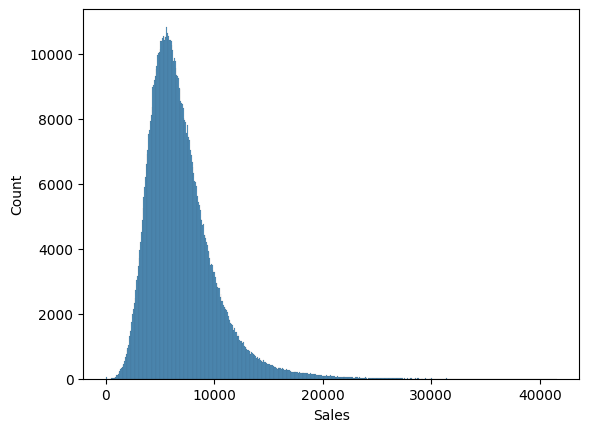

In [55]:
"""
When the store is closed, the sale is zero. So rows with sales 0 doesn't make sense.
But it's more efficient to remove rows with store 0. 
"""


reduced_train_df = train_merged_df[ train_merged_df.Open == 1 ].copy()

# Distribution of target column named 'sales'
sns.histplot(data=reduced_train_df, x='Sales')

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Axes: xlabel='Assortment', ylabel='Count'>

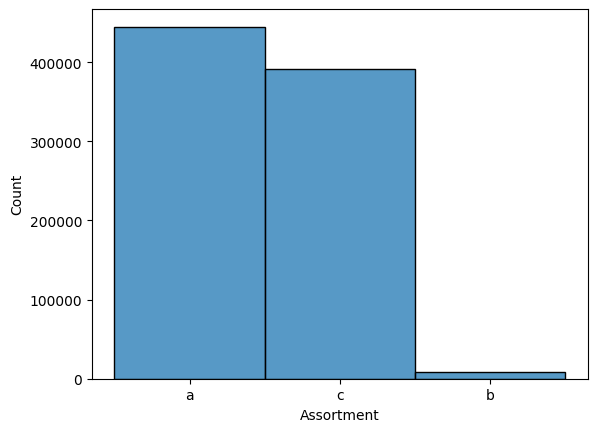

In [14]:
# Distribution of target column named 'sales'
sns.histplot(data=reduced_train_df, x='Assortment')

Text(0.5, 1.0, 'Sales vs Customers')

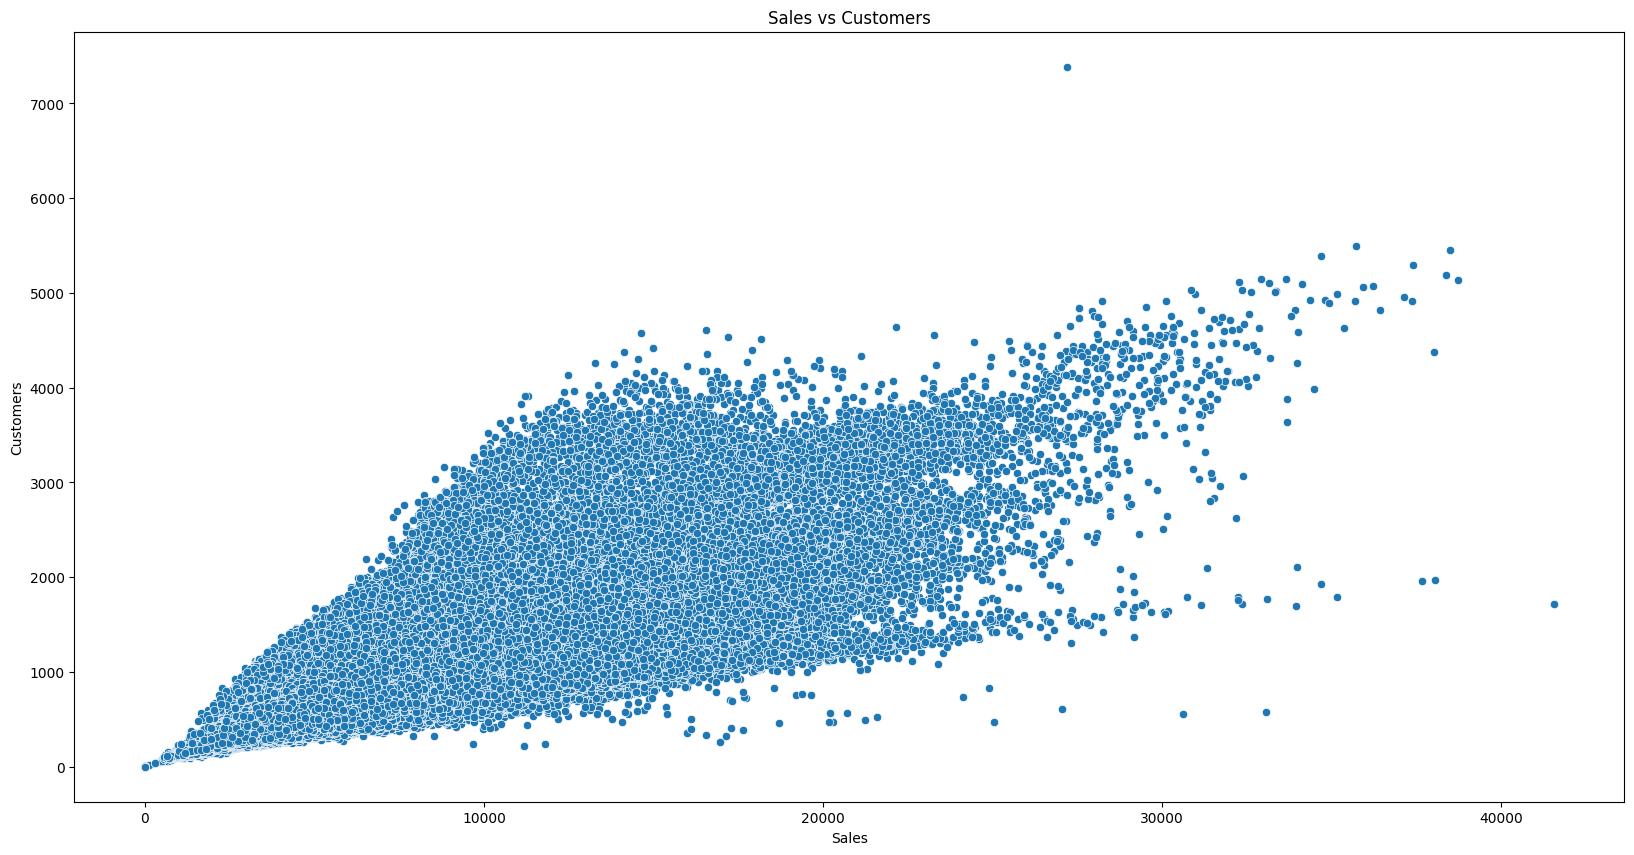

In [15]:
plt.figure(figsize=(20, 10))
# Sales vs Customers Scatter Plot
sns.scatterplot(x=reduced_train_df.Sales, y=reduced_train_df.Customers)
plt.title("Sales vs Customers")

<Axes: xlabel='StateHoliday', ylabel='Sales'>

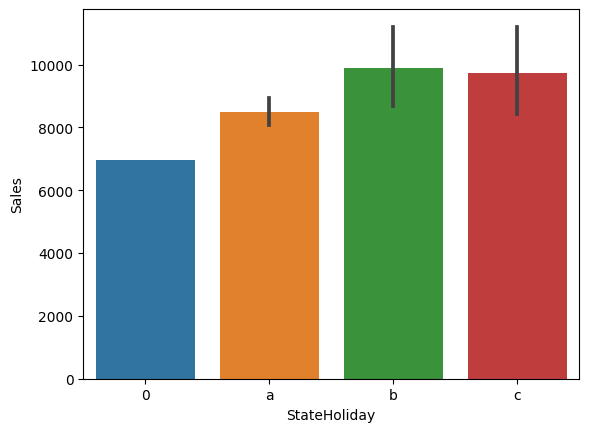

In [67]:
sns.barplot(data=reduced_train_df, x='StateHoliday', y='Sales')

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

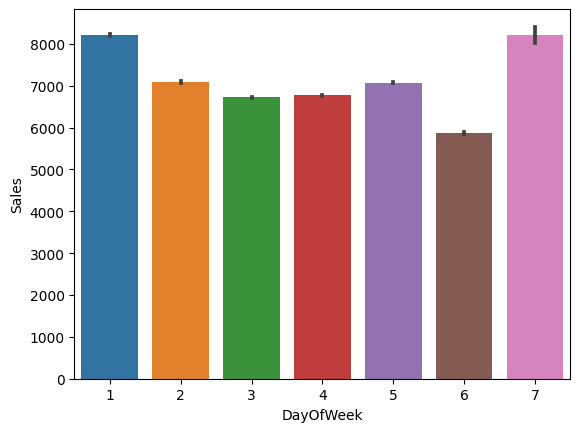

In [68]:
sns.barplot(x=reduced_train_df.DayOfWeek, y=reduced_train_df.Sales)

<Axes: xlabel='Assortment', ylabel='Sales'>

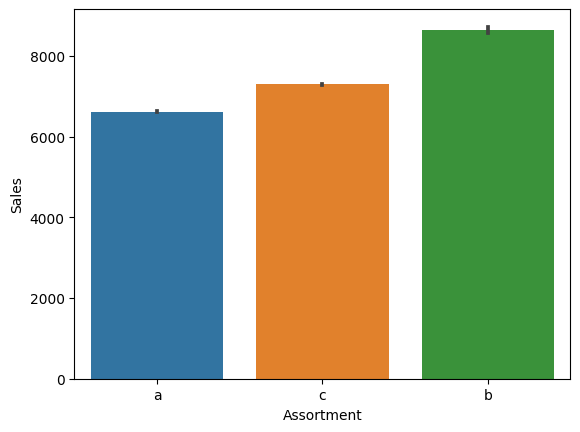

In [69]:
""" 
Assortment - describes an assortment level: a = basic, b = extra, c = extended """
sns.barplot(data=reduced_train_df, x='Assortment', y='Sales')

<Axes: xlabel='StoreType', ylabel='Sales'>

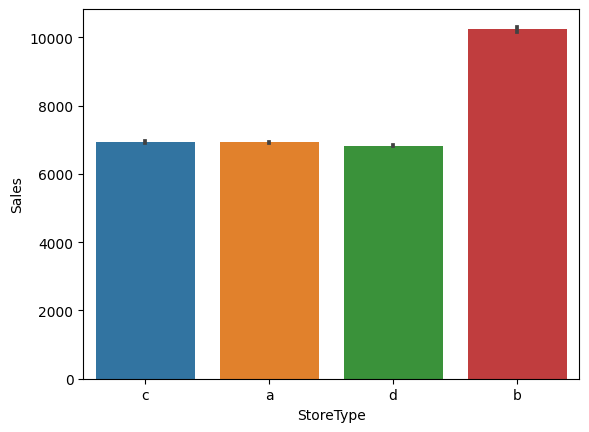

In [25]:
sns.barplot(data=reduced_train_df, x='StoreType', y='Sales')

2025-01-13 06:45:28,471 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-13 06:45:28,474 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


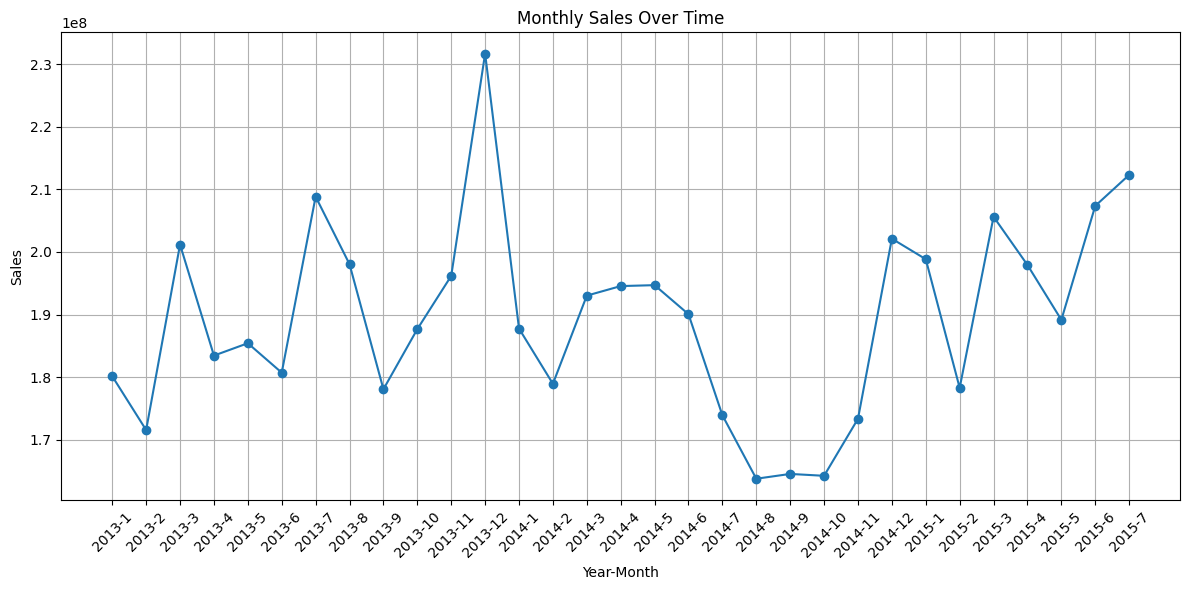

In [56]:
# Visualizing sales for each month over time

# Convert 'Date' column to datetime format
reduced_train_df['Date'] = pd.to_datetime(reduced_train_df['Date'])

# Extracting year and month from the 'Date' column
reduced_train_df['Year'] = reduced_train_df['Date'].dt.year
reduced_train_df['Month'] = reduced_train_df['Date'].dt.month
reduced_train_df['Day'] = reduced_train_df['Date'].dt.day

# Grouping by year and month, and summing up the sales for each group
monthly_sales = reduced_train_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

## dataset split

In [58]:
""" 
Test Datasets:
Transforming Datetime string column to pandas datetime for better access to Date column
 Create 3 new columns named year, month, day similar to train dataset. 

"""

test_merged_df['Date'] = pd.to_datetime(test_merged_df.Date)

test_merged_df['Year'] = test_merged_df.Date.dt.year
test_merged_df['Month'] = test_merged_df.Date.dt.month
test_merged_df['Day'] = test_merged_df.Date.dt.day

print(f"Estimate Sales from {test_merged_df.Date.dt.date.min()} to {test_merged_df.Date.dt.date.max()}")
test_merged_df.head(2)

Estimate Sales from 2015-08-01 to 2015-09-17


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17


In [59]:
train_df = reduced_train_df[reduced_train_df.Date.dt.year <= 2014]
val_df = reduced_train_df[reduced_train_df.Date.dt.year == 2015]

print(f"Training Shape: {train_df.shape}")
print(f"Validation Shape: {val_df.shape}")
print(f"Test Shape: {test_merged_df.shape}")

Training Shape: (648360, 20)
Validation Shape: (196032, 20)
Test Shape: (41088, 20)


In [61]:
# choose columns to train and target

# Set columns for training
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Promo2', 'Day', 'Month', 'Year']
# Set Target Column
target_col = 'Sales'

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_merged_df[input_cols].copy()

num_cols = ['Store', 'DayOfWeek', 'Day', 'Month', 'Year']
cat_cols = ['DayOfWeek', 'Promo', 'StoreType', 'Assortment', 'Promo2']

In [65]:
val_inputs.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType',
       'Assortment', 'Promo2', 'Day', 'Month', 'Year'],
      dtype='object')

# Encoding for ML only 

In [25]:
# Encoding

train_inputs = pd.get_dummies(train_inputs)
val_inputs = pd.get_dummies(val_inputs, drop_first=False)
test_inputs = pd.get_dummies(test_inputs)

# Drop the columns that are not in test dataset
train_inputs = train_inputs.drop(['StateHoliday_b', 'StateHoliday_c'], axis=1)
val_inputs = val_inputs.drop(['StateHoliday_b'], axis=1)

In [32]:
# Scaling



scaler = MinMaxScaler().fit(train_inputs[num_cols])

# Based on the learning from training datasets, val_df and test_df columns sclaed!
train_inputs[num_cols] = scaler.transform(train_inputs[num_cols])
val_inputs[num_cols] = scaler.transform(val_inputs[num_cols])
test_inputs[num_cols] = scaler.transform(test_inputs[num_cols])

In [33]:
check_missing_train=DataCleaner(test_inputs)
check_missing_train.check_missing_values()

2025-01-11 03:23:58,241 - INFO - Checking for missing values in the DataFrame.
2025-01-11 03:23:58,246 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,Store,0,0.0,float64
1,DayOfWeek,0,0.0,float64
2,Promo,0,0.0,int64
3,Promo2,0,0.0,int64
4,Day,0,0.0,float64
5,Month,0,0.0,float64
6,Year,0,0.0,float64
7,StateHoliday_0,0,0.0,bool
8,StateHoliday_a,0,0.0,bool
9,StoreType_a,0,0.0,bool


In [34]:
train_targets

236380      2605
236381      2269
236382      3804
236383     10152
236384      1830
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 648360, dtype: int64

In [35]:
val_targets

0          5263
1          6064
2          8314
3         13995
4          4822
          ...  
235997    12566
236033     7538
236212     7097
236345     3298
236361     7836
Name: Sales, Length: 196032, dtype: int64

In [36]:
"""
As the prediction will be evaluated on RMSPE metric, Create a user-defined
rmspe function. 

"""

def rmspe(y_true, y_pred):
    """
    Compute the Root Mean Square Percentage Error (RMSPE) between the true and predicted values.
    
    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    
    Returns:
    - float, RMSPE value
    """
    # Ensure both arrays have the same length
    assert len(y_true) == len(y_pred)
    
    # Compute the percentage error for each observation
    percentage_error = (y_true - y_pred) / y_true
    
    # Exclude observations where true value is zero
    percentage_error[y_true == 0] = 0
    
    # Square the percentage errors
    squared_percentage_error = percentage_error ** 2
    
    # Compute the mean of the squared percentage errors
    mean_squared_percentage_error = np.mean(squared_percentage_error)
    
    # Compute the square root of the mean squared percentage error
    rmspe = np.sqrt(mean_squared_percentage_error)
    
    return rmspe # Convert to percentage

In [37]:
# A helper function to automate task of fitting model and evaluating

def try_model(model):
    model.fit(train_inputs, train_targets)

    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)

    # Get RMSE
    train_rmse = np.round(mean_squared_error(train_targets, train_preds, squared=False), 5)
    val_rmse = np.round(mean_squared_error(val_targets, val_preds, squared=False), 5)

    # Get RMSPE
    train_rmspe = np.round(rmspe(train_targets, train_preds), 5)
    val_rmspe = np.round(rmspe(val_targets, val_preds), 5)


    print(f"Train RMSE: {train_rmse}")
    print(f"Val RMSE: {val_rmse}")
    print()
    print(f"Train RMSPE: {train_rmspe}")
    print(f"Val RMSPE: {val_rmspe}")

    return model

In [38]:
# Creating a dumb model that can predict average sales only
        
def get_mean(input):
    return np.full(len(input), reduced_train_df.Sales.mean())

dum_train_preds = get_mean(train_df)
dum_val_preds = get_mean(val_df)


# Get root mean squared error
dum_train_eval = mean_squared_error(dum_train_preds, train_targets, squared=False)
dum_val_eval = mean_squared_error(dum_val_preds, val_targets, squared=False)

train_rmspe = rmspe(dum_train_preds, train_targets)
val_rmspe = rmspe(dum_val_preds, val_targets)

print(f"train_rmse: {dum_train_eval}")
print(f"val_rmse: {dum_val_eval}")
print()
print(f"train_rmspe: {train_rmspe}")
print(f"val_rmspe: {val_rmspe}")

train_rmse: 3124.212911034433
val_rmse: 3037.1262166880488

train_rmspe: 0.44917065517162236
val_rmspe: 0.4366501296280081


In [39]:
logit_model = LinearRegression()
try_model(logit_model)

Train RMSE: 2787.21412
Val RMSE: 2694.62097

Train RMSPE: 0.53816
Val RMSPE: 0.47802


LinearRegression()

In [40]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
try_model(decision_tree_model)

Train RMSE: 0.0
Val RMSE: 1380.17354

Train RMSPE: 0.0
Val RMSPE: 0.21355


DecisionTreeRegressor(random_state=42)

In [41]:
random_forest_model = RandomForestRegressor(random_state=42, 
                                            n_jobs=-1)
try_model(random_forest_model)

Train RMSE: 400.79893
Val RMSE: 1134.79363

Train RMSPE: 0.09413
Val RMSPE: 0.1785


RandomForestRegressor(n_jobs=-1, random_state=42)

In [42]:
# submission
test_preds = random_forest_model.predict(test_inputs)
submission_df = pd.read_csv('/kaggle/input/sumbission/sample_submission.csv')
submission_df['Sales'] = test_preds
submission_df.to_csv('/kaggle/working/submission.csv', index=False)

In [43]:
feature_importance_df = pd.DataFrame({ 
    'feature': train_inputs.columns, 
    'importance': random_forest_model.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance_df

,feature,importance
0,Store,0.565438
2,Promo,0.134409
1,DayOfWeek,0.067784
4,Day,0.059565
5,Month,0.056752
10,StoreType_b,0.023134
3,Promo2,0.015872
9,StoreType_a,0.014520
15,Assortment_c,0.013404
6,Year,0.011328


<Axes: xlabel='importance', ylabel='feature'>

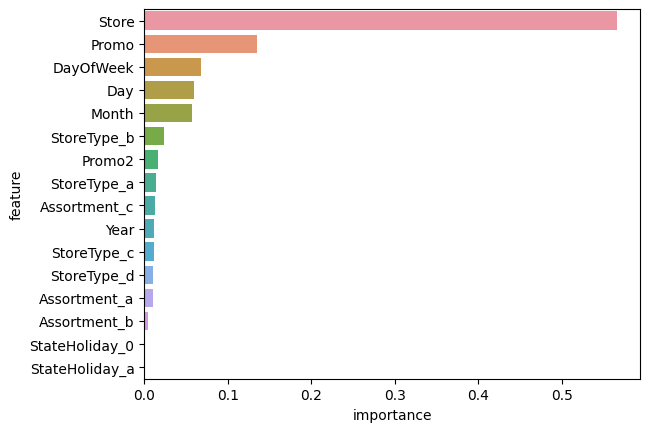

In [44]:
# Plot to visualize most important feature
sns.barplot(data=feature_importance_df, x='importance', y='feature')

In [ ]:
#!jupyter nbconvert --to notebook --execute notebooks/Task_2_prediction.ipynb --output notebooks/Task_2_prediction.ipynb

# NEW  LSTM

In [62]:
train_inputs.shape

(648360, 10)

In [63]:
val_inputs.shape

(196032, 10)

In [64]:
test_inputs.shape

(41088, 10)

In [66]:
print(f"train_inputs dataframe shape {train_inputs.shape}")
print(f"val_inputs dataframe shape {val_inputs.shape}")
print(f"test_inputs dataframe shape {test_inputs.shape}")

print(f"train_targets dataframe for with only Sales Column  {train_targets.shape}")
print(f"val_targets dataframe for with only Sales Column  {val_targets.shape}")

train_inputs dataframe shape (648360, 10)
val_inputs dataframe shape (196032, 10)
test_inputs dataframe shape (41088, 10)
train_targets dataframe for with only Sales Column  (648360,)
val_targets dataframe for with only Sales Column  (196032,)


In [67]:
# Step 0.1: Define columns for processing
categorical_cols = ['StateHoliday', 'StoreType', 'Assortment']
numerical_cols = ['Store', 'DayOfWeek', 'Promo', 'Promo2', 'Day', 'Month', 'Year']

# Preprocessing target data (Sales column)
train_targets_scaled = train_targets.values.reshape(-1, 1)
val_targets_scaled = val_targets.values.reshape(-1, 1)

# Preprocess input dataframes: ensure dates are integers
for col in ['Day', 'Month', 'Year']:
    train_inputs[col] = train_inputs[col].astype(np.int32)
    val_inputs[col] = val_inputs[col].astype(np.int32)
    test_inputs[col] = test_inputs[col].astype(np.int32)


In [68]:

# Step 1.1: Ensure categorical columns are strings
for col in ['StateHoliday', 'StoreType', 'Assortment']:
    train_inputs[col] = train_inputs[col].astype(str)
    val_inputs[col] = val_inputs[col].astype(str)
    test_inputs[col] = test_inputs[col].astype(str)

# Step 1.2: Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns
    ]
)

# Step 1.3: Transform input dataframes
train_inputs_processed = preprocessor.fit_transform(train_inputs)
val_inputs_processed = preprocessor.transform(val_inputs)
test_inputs_processed = preprocessor.transform(test_inputs)

# Step 1.4: Scale the target (Sales column)
scaler_targets = MinMaxScaler()
train_targets_scaled = scaler_targets.fit_transform(train_targets.values.reshape(-1, 1))
val_targets_scaled = scaler_targets.transform(val_targets.values.reshape(-1, 1))


In [69]:
def create_sequences(inputs, targets=None, sequence_length=60):
    X, y = [], []
    for i in range(len(inputs) - sequence_length):
        X.append(inputs[i:i + sequence_length])
        if targets is not None:
            y.append(targets[i + sequence_length])
    X = np.array(X)
    y = np.array(y) if targets is not None else None
    return X, y

# Generate sequences
sequence_length = 60

X_train, y_train = create_sequences(train_inputs_processed, train_targets_scaled, sequence_length)
X_val, y_val = create_sequences(val_inputs_processed, val_targets_scaled, sequence_length)
X_test, _ = create_sequences(test_inputs_processed, None, sequence_length)


In [28]:
# Step 3.1: Verify GPU Availability

print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Step 3.2: Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])




GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [ ]:

# Step 3.3: Train the model on Kaggle GPU
# Use a larger batch size if GPU memory allows for faster training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,          # Adjust as needed based on convergence
    batch_size=32,     # Larger batch size for GPU efficiency
    verbose=1
)


In [34]:
# Step 3.4: Save the trained model (optional)
# Save the model to Kaggle's output directory for later use
model.save('/kaggle/working/Kaim-week-4/lstm_sales_model.h5')
print("Model saved to lstm_sales_model.h5")

2025-01-11 06:05:37,022 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 
Model saved to lstm_sales_model.h5


In [70]:
@register_keras_serializable()
def mse(y_true, y_pred):
    return MeanSquaredError()(y_true, y_pred)

# Load the model with the registered `mse` function
model = load_model(
    '/kaggle/working/Kaim-week-4/lstm_sales_model.h5',
    custom_objects={'mse': mse}
)

print("Model loaded successfully.")


2025-01-13 06:51:28,157 - WARNING - Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Model loaded successfully.


6125/6125 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


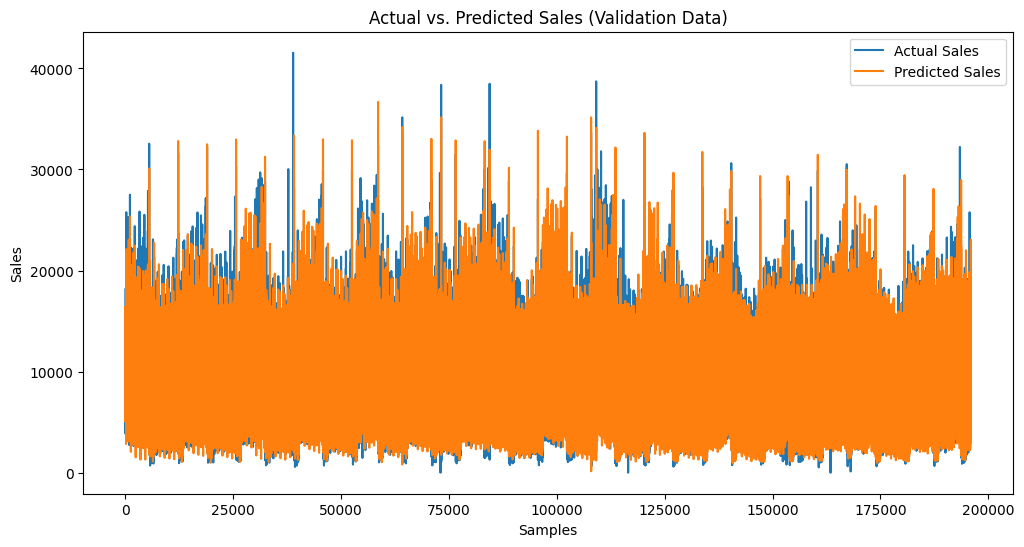

In [71]:
# Predict on validation data
val_predictions = model.predict(X_val)
val_predictions = scaler_targets.inverse_transform(val_predictions)
actual_val_targets = scaler_targets.inverse_transform(y_val)

# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(actual_val_targets, label='Actual Sales')
plt.plot(val_predictions, label='Predicted Sales')
plt.title('Actual vs. Predicted Sales (Validation Data)')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.legend()
plt.show()


Actual Sales Shape: (60,)
Predicted Sales Shape: (60,)


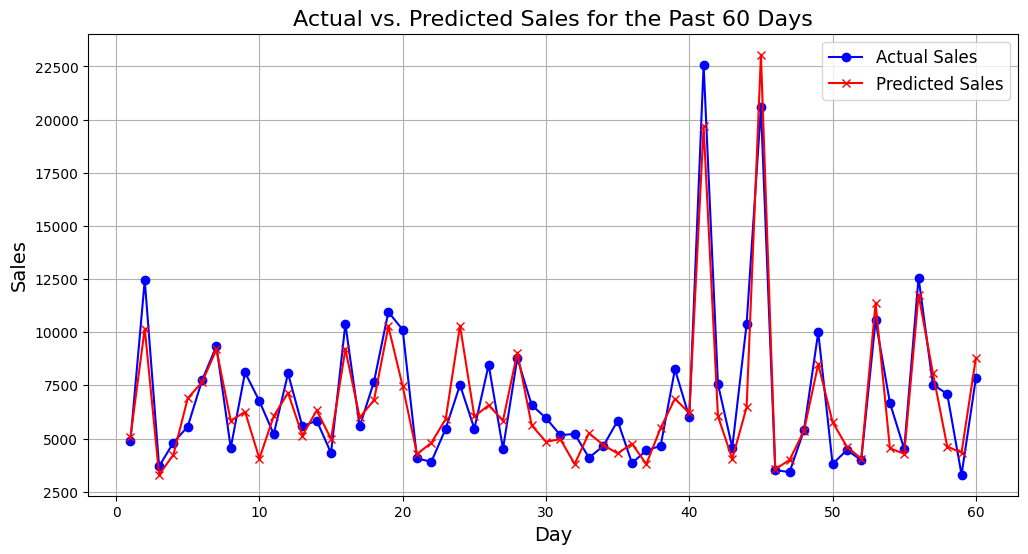

In [72]:
# Extract the past 60 days and plot actual vs predicted
X_last_60 = X_val[-60:]  # The last 60 sequences
y_last_60_actual = scaler_targets.inverse_transform(y_val[-60:].reshape(-1, 1)).flatten()  # Actual sales for the last 60 days

# Predict for the past 60 days
y_last_60_predicted = model.predict(X_last_60, verbose=0)  # Predict for all 60 sequences
y_last_60_predicted = scaler_targets.inverse_transform(y_last_60_predicted).flatten()  # Rescale predictions

# Check shapes
print(f"Actual Sales Shape: {y_last_60_actual.shape}")
print(f"Predicted Sales Shape: {y_last_60_predicted.shape}")

# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 61), y_last_60_actual, label='Actual Sales', marker='o', color='b')
plt.plot(np.arange(1, 61), y_last_60_predicted, label='Predicted Sales', marker='x', color='r')

plt.title("Actual vs. Predicted Sales for the Past 60 Days", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


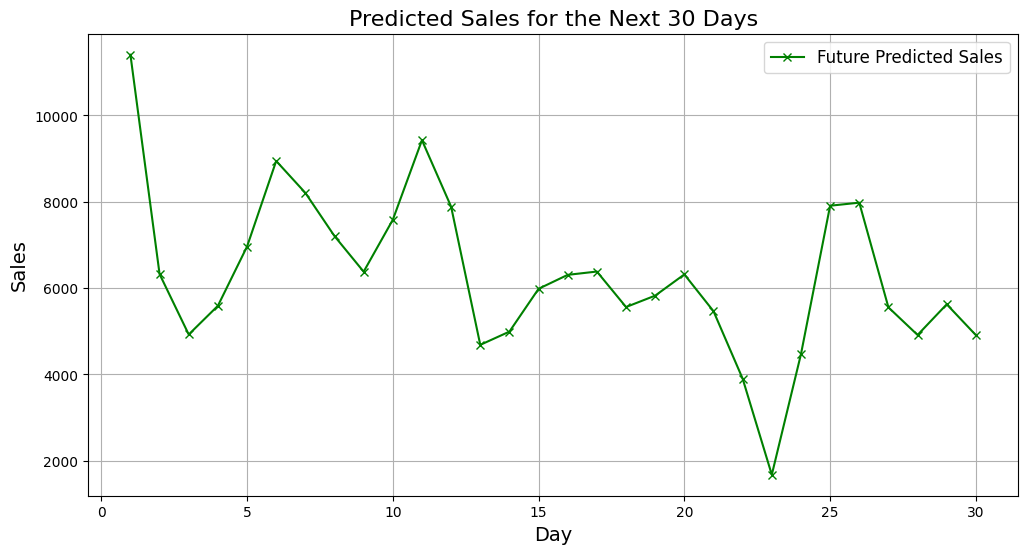

In [73]:
# Predict the next 30 days
future_predictions = []
current_input = X_test[-1].reshape(1, -1, X_test.shape[2])  # Start with the last sequence in test data

for _ in range(30):
    # Predict the next day
    next_pred = model.predict(current_input, verbose=0)  # Shape: (1, 1)
    
    # Expand next_pred to match input features
    next_pred_expanded = np.zeros((1, 1, current_input.shape[2]))
    next_pred_expanded[:, :, -1] = next_pred  # Fill the last feature with the prediction
    
    # Rescale prediction (if required)
    next_pred_rescaled = scaler_targets.inverse_transform(next_pred).flatten()[0]
    future_predictions.append(next_pred_rescaled)

    # Update input for the next day (shift the window and add the new prediction)
    next_input = np.append(current_input[:, 1:, :], next_pred_expanded, axis=1)
    current_input = next_input

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 31), future_predictions, label='Future Predicted Sales', marker='x', color='g')

plt.title("Predicted Sales for the Next 30 Days", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [81]:
! git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	lstm_sales_model.h5
	lstm_sales_model_1.h5
	scripts/__pycache__/__init__.cpython-310.pyc
	scripts/__pycache__/analysis.cpython-310.pyc
	scripts/__pycache__/data_load_clean_transform.cpython-310.pyc
	scripts/__pycache__/store_sales_prediction.cpython-310.pyc
	state.db

nothing added to commit but untracked files present (use "git add" to track)
